<a href="https://colab.research.google.com/github/Abdulazzam1/UAS-AI/blob/main/UAS_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings;
warnings.filterwarnings('ignore');
import pandas as pd

In [ ]:
data_location = "https://raw.githubusercontent.com/sdgroeve/D012513A-Specialised-Bio-informatics-Machine-Learning/main/practicum_I/"

In [ ]:
data_name = "acceptor_site_dataset.csv"

In [ ]:
data = pd.read_csv(data_location + data_name)

In [ ]:
print(data.head(5))

In [ ]:
print(data.subset.value_counts())

train    2752
test      552
Name: subset, dtype: int64


In [ ]:
print(data.head())
data["sequence"] = data["sequence"].map(lambda x: x[0:10]+x[12:22])
print(data.head())

                 sequence  label subset
0  TTTGAATTGTAGGTGTCCTGCT      1  train
1  TATTTTTTAAAGAACTGGAAGA      1  train
2  TTTCTTTTTCAGATGAAGAATG      1  train
3  TATTAATTTCAGTTTGGTTGTT      1  train
4  TAAAAATTTAAGTTCGTCCCGA      1  train
               sequence  label subset
0  TTTGAATTGTGTGTCCTGCT      1  train
1  TATTTTTTAAAACTGGAAGA      1  train
2  TTTCTTTTTCATGAAGAATG      1  train
3  TATTAATTTCTTTGGTTGTT      1  train
4  TAAAAATTTATTCGTCCCGA      1  train


In [ ]:
data_features = data['sequence'].str.split('', expand=True).iloc[:,1:21]
data_features.columns = ["%i"%i for i in range(-10,0,1)] + ["%i"%i for i in range(1,11,1)]

print(data_features)

     -10 -9 -8 -7 -6 -5 -4 -3 -2 -1  1  2  3  4  5  6  7  8  9 10
0      T  T  T  G  A  A  T  T  G  T  G  T  G  T  C  C  T  G  C  T
1      T  A  T  T  T  T  T  T  A  A  A  A  C  T  G  G  A  A  G  A
2      T  T  T  C  T  T  T  T  T  C  A  T  G  A  A  G  A  A  T  G
3      T  A  T  T  A  A  T  T  T  C  T  T  T  G  G  T  T  G  T  T
4      T  A  A  A  A  A  T  T  T  A  T  T  C  G  T  C  C  C  G  A
...   .. .. .. .. .. .. .. .. .. .. .. .. .. .. .. .. .. .. .. ..
3299   T  T  T  G  A  A  G  T  T  T  C  T  T  C  C  T  T  C  T  C
3300   C  T  G  C  T  A  A  T  A  T  T  G  A  C  A  G  C  A  A  T
3301   T  T  C  C  A  A  A  T  A  T  G  A  A  A  A  T  C  G  A  A
3302   A  A  A  A  T  G  T  C  G  C  A  A  C  A  A  C  A  A  G  A
3303   A  G  A  A  G  T  A  T  G  G  G  T  G  G  A  A  T  G  T  T

[3304 rows x 20 columns]


In [ ]:
def map_nucleotide_to_number(x):
    if x == 'A':
        return 0
    if x == 'C':
        return 1
    if x == 'G':
        return 2
    if x == 'T':
        return 3

for nucleotide, mapped_number in zip(['A','C','G','T'],range(4)):
    if map_nucleotide_to_number(nucleotide) != mapped_number:
        print("Function is not working for nucleotide %s"%nucleotide)
    else:
        print("Function works for nucleotide %s"%nucleotide)

Function works for nucleotide A
Function works for nucleotide C
Function works for nucleotide G
Function works for nucleotide T


In [ ]:

data_features_numerical = data_features.applymap(map_nucleotide_to_number)

print(data_features_numerical)

      -10  -9  -8  -7  -6  -5  -4  -3  -2  -1  1  2  3  4  5  6  7  8  9  10
0       3   3   3   2   0   0   3   3   2   3  2  3  2  3  1  1  3  2  1   3
1       3   0   3   3   3   3   3   3   0   0  0  0  1  3  2  2  0  0  2   0
2       3   3   3   1   3   3   3   3   3   1  0  3  2  0  0  2  0  0  3   2
3       3   0   3   3   0   0   3   3   3   1  3  3  3  2  2  3  3  2  3   3
4       3   0   0   0   0   0   3   3   3   0  3  3  1  2  3  1  1  1  2   0
...   ...  ..  ..  ..  ..  ..  ..  ..  ..  .. .. .. .. .. .. .. .. .. ..  ..
3299    3   3   3   2   0   0   2   3   3   3  1  3  3  1  1  3  3  1  3   1
3300    1   3   2   1   3   0   0   3   0   3  3  2  0  1  0  2  1  0  0   3
3301    3   3   1   1   0   0   0   3   0   3  2  0  0  0  0  3  1  2  0   0
3302    0   0   0   0   3   2   3   1   2   1  0  0  1  0  0  1  0  0  2   0
3303    0   2   0   0   2   3   0   3   2   2  2  3  2  2  0  0  3  2  3   3

[3304 rows x 20 columns]


In [ ]:
X_train = data_features_numerical.loc[data.subset == "train"]
X_test = data_features_numerical.loc[data.subset == "test"]

In [ ]:
y_train = data.loc[data.subset == "train"]["label"]
y_test = data.loc[data.subset == "test"]["label"]


In [ ]:
print(y_train.value_counts())

0    2497
1     255
Name: label, dtype: int64


In [ ]:
print(y_test.value_counts())

0    497
1     55
Name: label, dtype: int64


In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
print(lr_model)

LogisticRegression()


In [ ]:
lr_model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
predictions = lr_model.predict(X_test)
print(predictions)

[1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0 1 0 0 0 1 1
 0 1 0 0 1 1 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 

In [ ]:
from sklearn import metrics

score_acc = metrics.accuracy_score(y_test,predictions)

print(score_acc)

0.9202898550724637


In [ ]:
predictions_zero = [0]*len(y_test)
print(predictions_zero)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
score_acc = metrics.accuracy_score(y_test,predictions_zero)
print(score_acc)

0.9003623188405797


In [ ]:
from sklearn.metrics import roc_auc_score
score_auc = roc_auc_score(y_test,predictions)
print(score_auc)

0.6970184744832632


In [ ]:
print(predictions)

[1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0 1 0 0 0 1 1
 0 1 0 0 1 1 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 

In [ ]:
predictions = pd.DataFrame(lr_model.predict_proba(X_test),columns=["prob_0","prob_1"])

print(predictions)

       prob_0    prob_1
0    0.327520  0.672480
1    0.425903  0.574097
2    0.341907  0.658093
3    0.999413  0.000587
4    0.942077  0.057923
..        ...       ...
547  0.823318  0.176682
548  0.996326  0.003674
549  0.997360  0.002640
550  0.984624  0.015376
551  0.970995  0.029005

[552 rows x 2 columns]


In [ ]:
score_auc = metrics.roc_auc_score(y_test,predictions["prob_1"])
print(score_auc)

0.897969635997805


In [ ]:
data_features_onehot_encoding = pd.get_dummies(data_features)

print(data_features_onehot_encoding)

      -10_A  -10_C  -10_G  -10_T  -9_A  -9_C  -9_G  -9_T  -8_A  -8_C  ...  \
0         0      0      0      1     0     0     0     1     0     0  ...   
1         0      0      0      1     1     0     0     0     0     0  ...   
2         0      0      0      1     0     0     0     1     0     0  ...   
3         0      0      0      1     1     0     0     0     0     0  ...   
4         0      0      0      1     1     0     0     0     1     0  ...   
...     ...    ...    ...    ...   ...   ...   ...   ...   ...   ...  ...   
3299      0      0      0      1     0     0     0     1     0     0  ...   
3300      0      1      0      0     0     0     0     1     0     0  ...   
3301      0      0      0      1     0     0     0     1     0     1  ...   
3302      1      0      0      0     1     0     0     0     1     0  ...   
3303      1      0      0      0     0     0     1     0     1     0  ...   

      8_G  8_T  9_A  9_C  9_G  9_T  10_A  10_C  10_G  10_T  
0       1    0

In [ ]:
X_train = data_features_onehot_encoding.loc[data.subset == "train"]
X_test = data_features_onehot_encoding.loc[data.subset == "test"]

lr_model.fit(X_train,y_train)

predictions = pd.DataFrame(lr_model.predict_proba(X_test),columns=["prob_0","prob_1"])
score_auc = metrics.roc_auc_score(y_test,predictions["prob_1"])


print(score_auc)

0.9851472471190781


In [ ]:
print(lr_model.coef_[0])

[ 0.18535922 -0.17254465 -0.64432076  0.63155105  0.36323346  0.09664242
 -0.82511475  0.36528374  0.42644274 -0.00627464 -1.01475009  0.59462685
  0.2943751  -0.68264436 -0.36023434  0.74854847  0.62222768 -1.22208009
 -0.13600194  0.73589922  0.10617957  0.17511685 -0.97650548  0.69525393
 -0.30416484 -0.40788395 -1.10386006  1.81595372 -0.21790803 -1.20477227
 -1.11330282  2.53602798  0.0671242  -0.15447455 -1.36278366  1.45017887
 -0.6199823   2.10008164 -1.93416747  0.454113    0.31268108 -0.83265987
  1.45490251 -0.93487886 -0.35797043  0.26184045 -0.08013915  0.17631399
 -0.0247569   0.23742285  0.40959851 -0.6222196  -0.31194619  0.29535498
  0.42828426 -0.41164818 -0.20320261  0.19427966  0.3345353  -0.32556748
 -0.30042054  0.66079598  0.26838713 -0.62871771 -0.20485503  0.36583118
  0.2601907  -0.42112198 -0.24838684  0.44239752  0.33979426 -0.53376007
 -0.21496153  0.00264659  0.35339661 -0.1410368  -0.69564289  0.42731881
  0.38151408 -0.11314514]


In [ ]:
model_parameters = pd.DataFrame()
model_parameters["feature"] = data_features_onehot_encoding.columns
model_parameters["parameter_value"] = lr_model.coef_[0]
print(model_parameters)

   feature  parameter_value
0    -10_A         0.185359
1    -10_C        -0.172545
2    -10_G        -0.644321
3    -10_T         0.631551
4     -9_A         0.363233
..     ...              ...
75     9_T        -0.141037
76    10_A        -0.695643
77    10_C         0.427319
78    10_G         0.381514
79    10_T        -0.113145

[80 rows x 2 columns]


<Axes: xlabel='feature'>

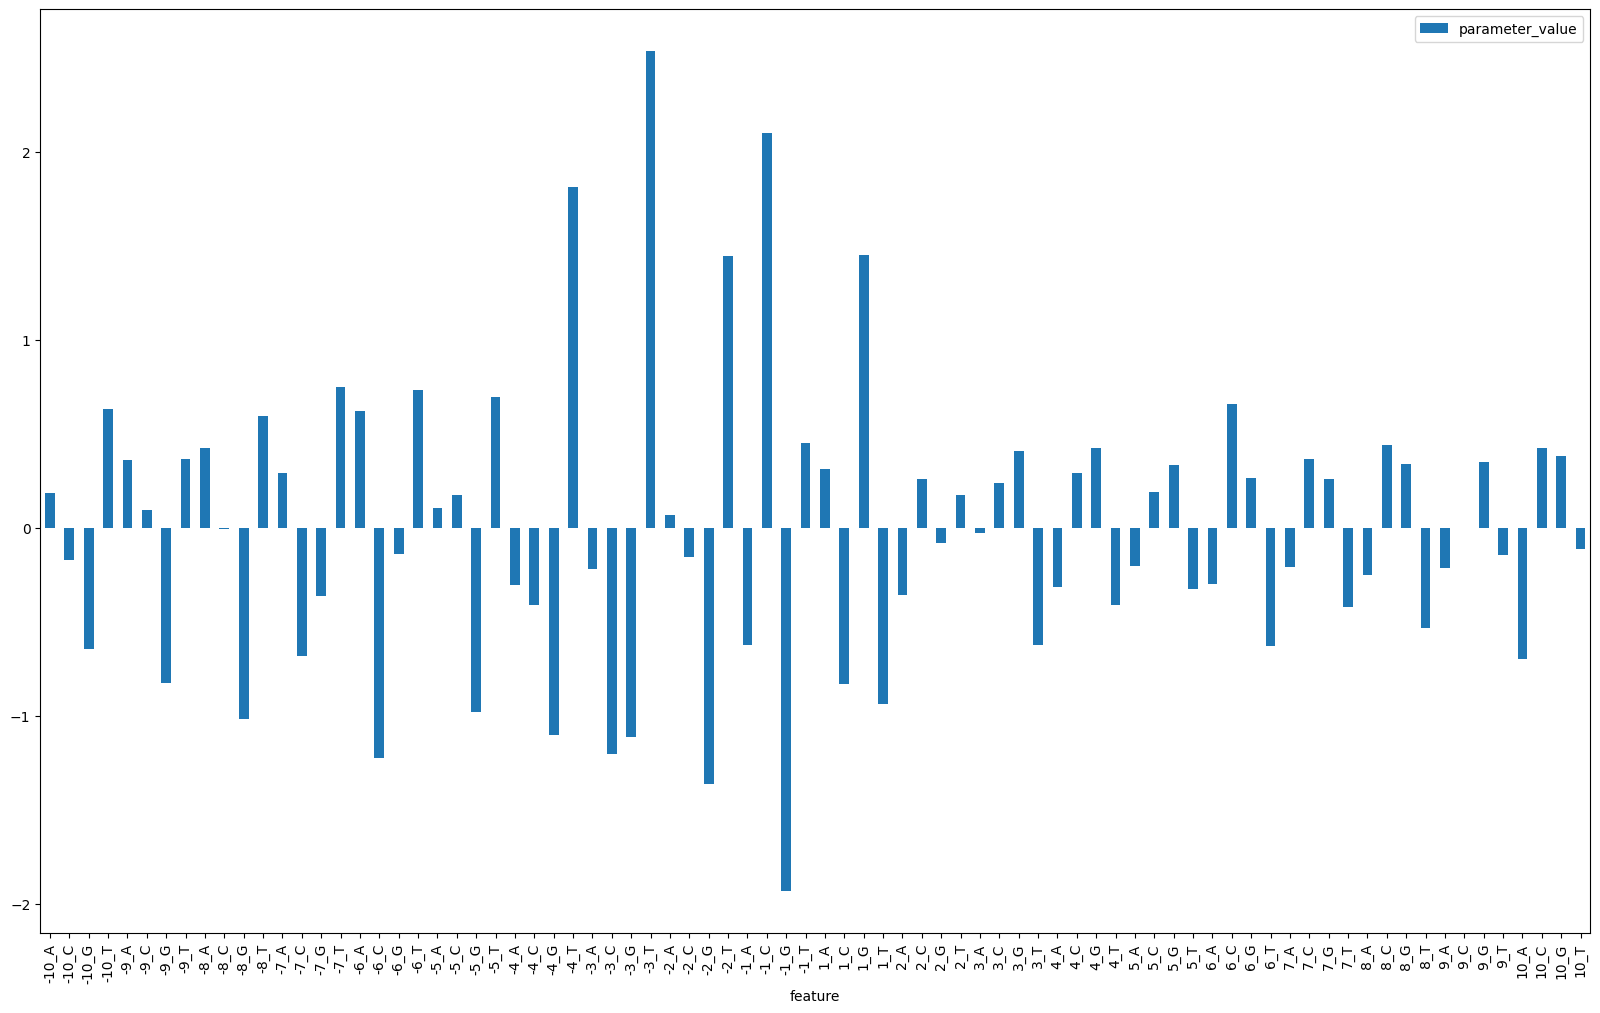

In [ ]:
model_parameters.plot.bar(x="feature",y="parameter_value",figsize=(20,12))